In [ ]:
#PROJECT 2
#Applying K MEANS CLUSTERING on Dataset||Indian Earthquakes Dataset(2018 onwards)||Indian_earthquake_data(from kaggle)

#Creating dataframe
import pandas as pd
df=pd.read_csv('/content/Indian_earthquake_data.csv')
df

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"
...,...,...,...,...,...,...
2714,2019-08-04 06:56:19 IST,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl..."
2715,2019-08-04 05:40:33 IST,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India"
2716,2019-08-03 16:29:37 IST,22.50,88.10,10.0,3.6,"28km WSW of Kolkata, India"
2717,2019-08-03 01:59:11 IST,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India"


In [ ]:
#there are no empty(null) spaces in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth        2719 non-null   float64
 4   Magnitude    2719 non-null   float64
 5   Location     2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


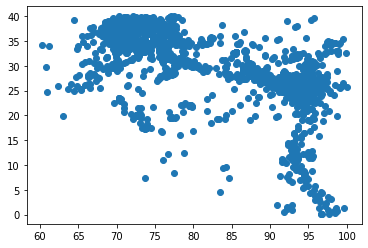

In [ ]:
#Data Visualization on points where earthquakes occured
import matplotlib.pyplot as plt
plt.scatter(df['Longitude'],df['Latitude'])#representing as shown in map 

In [ ]:
#Dividing data into input and output
#creating input(Longitude,Latitude)
x=df.iloc[:,[2,1]].values
x

array([[77.42, 29.06],
       [72.92, 19.93],
       [74.37, 31.5 ],
       ...,
       [88.1 , 22.5 ],
       [94.2 , 24.6 ],
       [92.9 , 14.5 ]])

In [ ]:
#2719 rows(points), 6 columns
df.shape

(2719, 6)

In [ ]:
#finding sqaure root of 2719
import numpy as np
np.sqrt(2719)

52.14403129793476

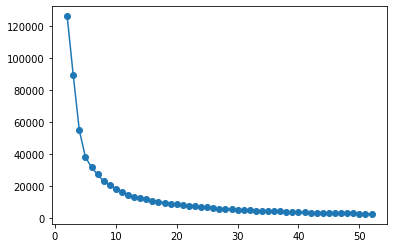

In [ ]:
#no of clusters should be in the range of 2 to 53

from sklearn.cluster import KMeans
k=range(2,53)
s=[]
for i in k :
  model_demo=KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
  s.append(model_demo.inertia_)
plt.scatter(k,s)
plt.plot(k,s)
#from ELBOW METHOD we can say that prominent point can be in range (2,10)

2 Clusters ,Score = 0.6539436830056814
3 Clusters ,Score = 0.5909525390590425
4 Clusters ,Score = 0.6147081891189834
5 Clusters ,Score = 0.6027082160971342
6 Clusters ,Score = 0.5437930418817251
7 Clusters ,Score = 0.5509742903479136
8 Clusters ,Score = 0.56612125756764
9 Clusters ,Score = 0.5271225395705129


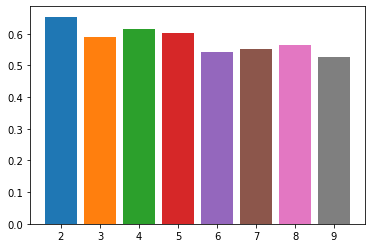

In [ ]:
#Applying SILHOUETTE SCORE METHOD to find prominent point in range (2,10)
from sklearn.metrics import silhouette_score
k = range(2,10)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))
#from SILHOUETTE SCORE METHOD we conclude 2 clusters would be appropriate

In [ ]:
#Applying Clusterer
#no of clusters=2
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2,random_state = 0)
model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [ ]:
y = model.predict(x)
# predicting which point is in which cluster
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

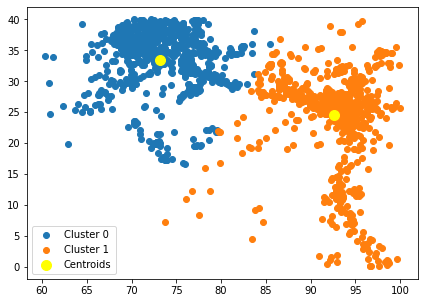

In [ ]:
##FINAL VISUALISATION of earthquake points after clustering with their respective centroids
plt.figure(figsize = (7,5))
for i in range(2):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'yellow',
            label = 'Centroids')
plt.legend()